In [60]:
import pandas as pd
from detoxify import Detoxify
import json

# Load the JSON file
with open('filtered_output.json', 'r') as f:
    data = json.load(f)

# Convert to DataFrame
jokes = pd.DataFrame(data)
jokes.head()


## EDA

In [4]:
# lower case
jokes['body'] = jokes['body'].str.lower()
jokes.head()

,body,id,score,title
0,they start to feel some light precipitation\n\...,5twufa,141,A couple are walking in St. Petersburg square ...
1,he was a seasoned veteran,5twqzh,109,I met a Soldier that survived Mustard Gas and ...
2,twin sisters just turned one hundred years old...,5twb5a,135,Twin sisters just turned 100 years old
3,flashbacks,5tw83v,144,"What do you get when you spell the word ""man"" ..."
4,a married irishman went into the confessional ...,5tvmme,17972,Putting it in.


In [56]:
# list of "potentially" offensive
race = ['black','jew','jewish','nazi','holocaust','asian','chinese','indian','mexican','nigger','white']
swear = ['fuck','shit','bitch','ass']

race_sum = 0
for word in race:
    offensive_row = jokes[jokes['body'].str.contains(word)]
    length = len(offensive_row)
    race_sum += length

swear_sum = 0
for word in swear:
    offensive_row = jokes[jokes['body'].str.contains(word)]
    length = len(offensive_row)
    swear_sum += length


print(f'Race: {race_sum}')
print(f'Swear: {swear_sum}')


Race: 1350
Swear: 3829


In [37]:
import matplotlib.pyplot as plt

jokes['jokes_length'] = jokes['body'].str.len() # count the jokes length
length_counts = jokes['jokes_length'].value_counts().sort_index() # put same length together

print(length_counts)

jokes_length
0        242
1          7
2         10
3         22
4         39
        ... 
9170       1
9186       1
9297       1
9996       1
11756      1
Name: count, Length: 2007, dtype: int64


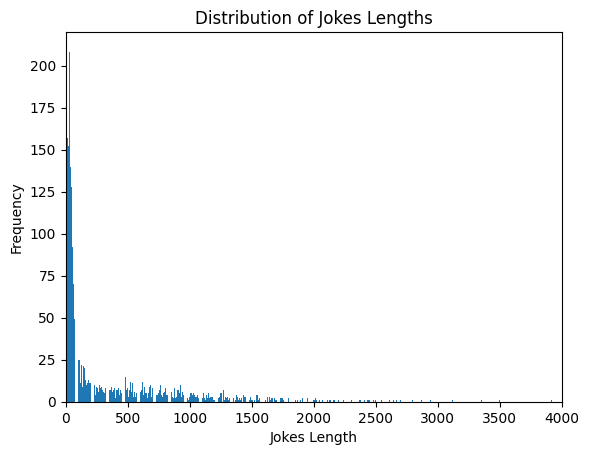

In [54]:
capped_values = [min(length, 3000) for length in length_counts]

plt.bar(length_counts.index, capped_values)
plt.xlabel('Jokes Length')
plt.ylabel('Frequency')
plt.title('Distribution of Jokes Lengths')
plt.ylim(0, 220)
plt.xlim(0,4000)
plt.show()

In [57]:
more_than_4k = jokes[jokes['jokes_length'] >= 4000]
print(len(more_than_4k))

34


In [58]:
!pip install pillow wordcloud 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


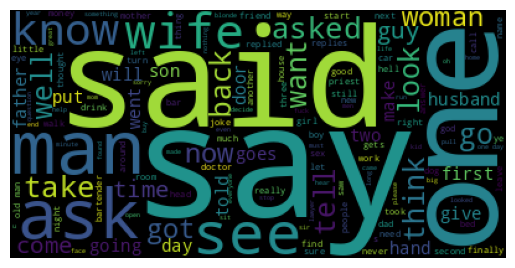

In [59]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(' '.join(jokes['body']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()